<a href="https://colab.research.google.com/github/Shalinina/Assignment4/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Model Metrics:
Mean Squared Error: 2901.8369415567036
R-squared Score: 0.4522925957397932

Model with BMI, S5, and Blood Pressure Metrics:
Mean Squared Error: 2891.037211291966
R-squared Score: 0.45433099153843404
Variables in the dataset:
['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

Correlation Matrix:
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


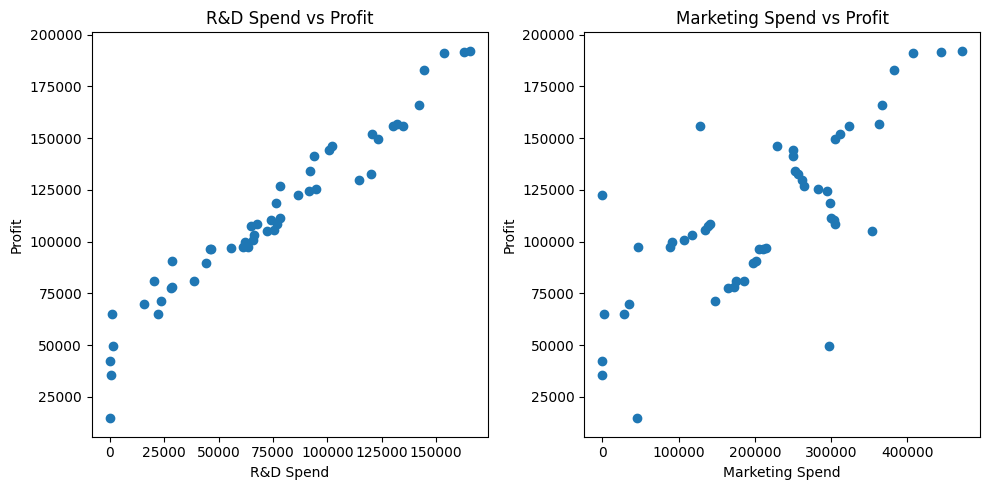


Training Set Metrics:
RMSE: 9101.191468669915
R-squared Score: 0.9518828286863577

Testing Set Metrics:
RMSE: 8206.328813165857
R-squared Score: 0.9168381183550246
Optimal alpha for Ridge Regression: 0.0001
Optimal alpha for LASSO Regression: 0.0001


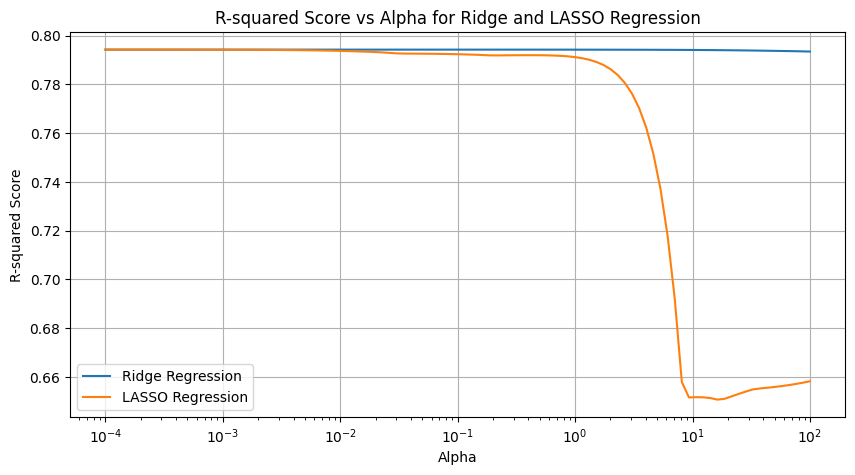

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_initial = X[:, [2, 8]]

X_train, X_test, y_train, y_test = train_test_split(X_initial, y, test_size=0.2, random_state=42)

initial_model = LinearRegression()
initial_model.fit(X_train, y_train)

initial_predictions = initial_model.predict(X_test)
initial_mse = mean_squared_error(y_test, initial_predictions)
initial_r2 = r2_score(y_test, initial_predictions)

print("Initial Model Metrics:")
print("Mean Squared Error:", initial_mse)
print("R-squared Score:", initial_r2)


X_with_bp = np.column_stack((X[:, [2, 8]], X[:, 3]))

X_train_bp, X_test_bp, y_train_bp, y_test_bp = train_test_split(X_with_bp, y, test_size=0.2, random_state=42)

model_with_bp = LinearRegression()
model_with_bp.fit(X_train_bp, y_train_bp)


predictions_with_bp = model_with_bp.predict(X_test_bp)
mse_with_bp = mean_squared_error(y_test_bp, predictions_with_bp)
r2_with_bp = r2_score(y_test_bp, predictions_with_bp)

print("\nModel with BMI, S5, and Blood Pressure Metrics:")
print("Mean Squared Error:", mse_with_bp)
print("R-squared Score:", r2_with_bp)
print("=" * 100)


#===============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

dataset_path = "50_Startups.csv"
df = pd.read_csv(dataset_path, delimiter=",")

# Drop the 'State' column
df = df.drop(columns=['State'])

print("Variables in the dataset:")
print(df.columns.tolist())

correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['R&D Spend'], df['Profit'])
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

plt.subplot(1, 2, 2)
plt.scatter(df['Marketing Spend'], df['Profit'])
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

X = df[['R&D Spend', 'Marketing Spend']]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
train_r2 = r2_score(y_train, train_predictions)

test_predictions = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_r2 = r2_score(y_test, test_predictions)

print("\nTraining Set Metrics:")
print("RMSE:", train_rmse)
print("R-squared Score:", train_r2)

print("\nTesting Set Metrics:")
print("RMSE:", test_rmse)
print("R-squared Score:", test_r2)
print("=" * 100)
#=================================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

auto_df = pd.read_csv("Auto.csv", na_values='?')

auto_df.dropna(inplace=True)

X = auto_df.drop(columns=['mpg', 'name', 'origin'])
y = auto_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-4, 2, 100)
ridge_scores = []
lasso_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_predictions = ridge_model.predict(X_test)
    ridge_scores.append(r2_score(y_test, ridge_predictions))

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_predictions = lasso_model.predict(X_test)
    lasso_scores.append(r2_score(y_test, lasso_predictions))

optimal_alpha_ridge = alphas[np.argmax(ridge_scores)]
optimal_alpha_lasso = alphas[np.argmax(lasso_scores)]

print("Optimal alpha for Ridge Regression:", optimal_alpha_ridge)
print("Optimal alpha for LASSO Regression:", optimal_alpha_lasso)

plt.figure(figsize=(10, 5))
plt.plot(alphas, ridge_scores, label='Ridge Regression')
plt.plot(alphas, lasso_scores, label='LASSO Regression')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R-squared Score')
plt.title('R-squared Score vs Alpha for Ridge and LASSO Regression')
plt.legend()
plt.grid(True)
plt.show()
print("=" * 100)

